# Problem Set 2

## Problem 1: Diabetes (3 points)

Load the scikit-learn [diabetes data set](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) using `sklearn.datasets.load_diabetes` (see code below). This data set describes diabetes progression for $n=442$ patients. The relevant columns we will study here are as follows.

| Variable | Symbol | Description                            | Units |
| -------- | ------ | -------------------------------------- | ----- |
| `age`    | $x_1$  | age                                    | Years |
| `sex`    | $x_2$  | sex of the patient (encoded as 1 or 2) | -     |
| `bmi`    | $x_3$  | body mass index                        | kg/m² |
| `bp`     | $x_4$  | blood pressure                         | mmHg  |
| `target` | $y$    | measure of diabetes progression        | -     |

In this exercise, we build a simple, multi-dimensional linear regression model, i.e.,
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \epsilon \, ,$$
where $\epsilon$ is homoscedastic noise.

(a) What are the best-fit coefficients, $\mathbf{\hat \beta} = (\hat \beta_0, \hat \beta_1, \hat \beta_2, \hat \beta_3, \hat \beta_4)$, assuming homoscedasticity?

(b) Make a scatter plot of the predicted vs. the observed $y$ values. What is the mean squared error (MSE), $\mathrm{MSE} = \frac{1}{n} \sum\limits_{i=1}^{n} (y_i - \hat y_i)^2$, where $\hat y_i$ is the best-fit prediction for patient $i$?

(c) Assuming a standard deviation $\sigma_y$ of $60$ for $y$, determine whether there are significant trends in diabetes with age, sex, BMI, or blood pressure. We will call an estimated slope $\hat\beta_i$ statistically significant if it is at least $3$ standard deviations $\sigma_{\hat\beta_i}$ away from $0$. (Hint: Remember that $\mathrm{Var}(\hat\beta) = \sigma_y^2 (\mathbf{X}^T \mathbf{X})^{-1}$.)

MSE = 3556.3831672074466

Beta 0: -199.069
Beta 1: 0.135
Beta 2: -10.159
Beta 3: 8.484
Beta 4: 1.435

Beta 0: 205.830		Sigma beta 0: 519.268

Beta 1: 105.332		Sigma beta 1: 0.054

Beta 2: 182.537		Sigma beta 2: 35.097

Beta 3: 129.173		Sigma beta 3: 0.498
BMI is a statistically significant indicator of diabetes risk. (129.173 >= 1.493)

Beta 4: 137.564		Sigma beta 4: 0.057
Blood pressure is a statistically significant indicator of diabetes risk. (137.564 >= 0.172)



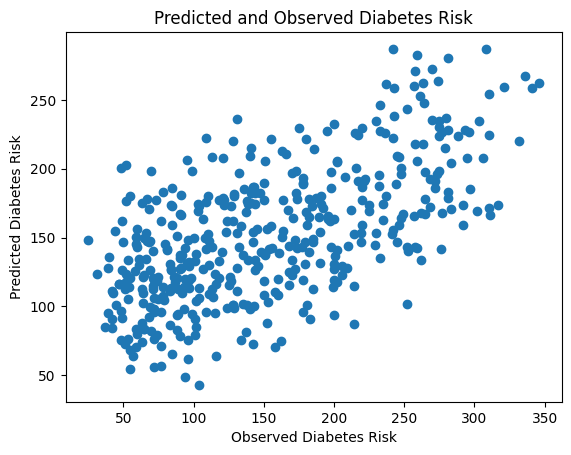

In [1]:
from statistics import variance

from scipy.stats import pearsonr, variation
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

data = load_diabetes(as_frame=True, scaled=False)
df = data.data
df['target'] = data.target

# returns design matrix, y
def design_matrix():
    # initialize variables
    x1 = df["age"]
    x2 = df["sex"]
    x3 = df["bmi"]
    x4 = df["bp"]
    y = df["target"]

    # fill design matrix
    X = np.empty((len(df), 5))
    for row in range(len(X)):
        for col in range(len(X[0])):
            # going vertically, so columns should remain the same
            match col:
                case 0:
                    X[row][col] = 1
                case 1:
                    X[row][col] = x1[row]
                case 2:
                    X[row][col] = x2[row]
                case 3:
                    X[row][col] = x3[row]
                case 4:
                    X[row][col] = x4[row]
    return X, y

def run_regression():
    X, y = design_matrix()
    reg = LinearRegression(fit_intercept=False).fit(X, y)
    y_pred = reg.predict(X)

    plt.scatter(y, y_pred)
    plt.title("Predicted and Observed Diabetes Risk")
    plt.xlabel('Observed Diabetes Risk')
    plt.ylabel('Predicted Diabetes Risk')
    print(f"MSE = {mean_squared_error(y, y_pred)}")

def significant_sd():
    X, y = design_matrix()

    # get and print beta values
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    y_pred = X @ beta
    print(f"\nBeta 0: {beta[0]:0.3f}\nBeta 1: {beta[1]:0.3f}\nBeta 2: {beta[2]:0.3f}\nBeta 3: {beta[3]:0.3f}\nBeta 4: {beta[4]:0.3f}\n")

    sigma_y = 60

    # get beta sigmas from arr diagonal
    beta_var_arr = list(sigma_y ** 2 * np.linalg.inv(X.T @ X))
    beta_var_list = []
    for row in range(len(beta_var_arr)):
        beta_var_list.append(beta_var_arr[row][row])

    # determine if beta is greater than 3x its standard deviation
    var_str_list = ["None", "Age", "Sex", "BMI", "Blood pressure"]
    for i in range(5):
        print(f"Beta {i}: {y_pred[i]:0.3f}\t\tSigma beta {i}: {beta_var_list[i]:0.3f}")
        if abs(beta[i]) > 3 * beta_var_list[i]:
            print(f"{var_str_list[i]} is a statistically significant indicator of diabetes risk. ({y_pred[i]:0.3f} >= {3 * beta_var_list[i]:0.3f})\n")
        else:
            print()


run_regression()
significant_sd()

## Problem 2: Exoplanets (3 points)

In this exercise, we will try to detect a (simulated) exoplanet. One way to detect exoplanets is by detecting a wobbling of the host star as the gravity of the planet pulls on it. Assuming no orbital eccentricity and a period of exactly one year, the measured velocity (in m/s) of the star as a function of time $t$ (in years) can be described by
$$v(t) = A \sin \left( 2 \pi t + B \right) \, ,$$
where $A$ is the amplitude of the wobbling and $B$ a phase offset. We can re-write this equation into a convenient linear form,
$$v(t) = \beta_0 \sin \left( 2 \pi t \right) + \beta_1 \cos \left( 2 \pi t \right) \, ,$$
where $\beta_0$ and $\beta_1$ are regression coefficients. $A$, the amplitude, is related to the coefficients via $A^2 = \beta_0^2 + \beta_1^2$.

The measured data is provided in `Problem_Set_2_Exoplanets.csv`.

(a) Make a scatter plot of the measured velocity as a function of time.

(b) Determine the best-fit model and overplot it on the scatter plot.

(c) Calculate the uncertainties on the coefficients $\mathbf{\beta}$ assuming $\sigma_v = 1 \mathrm{m} / \mathrm{s}$. Show that the off-diagonal element $\mathrm{Cov}(\beta_0, \beta_1) = \sigma_{\beta_0} \sigma_{\beta_1} r_{\beta_0 \beta_1}$ is close to zero, and therefore the coefficients are approximately uncorrelated. In that case, the uncertainty on the amplitude $A$ can be derived via error propagation, $\sigma_A = \frac{1}{A} \sqrt{\beta_0^2 \sigma_{\beta_0}^2 + \beta_1^2 \sigma_{\beta_1}^2}$. What is the amplitude and its associated uncertainty (standard deviation)? Please include proper units.

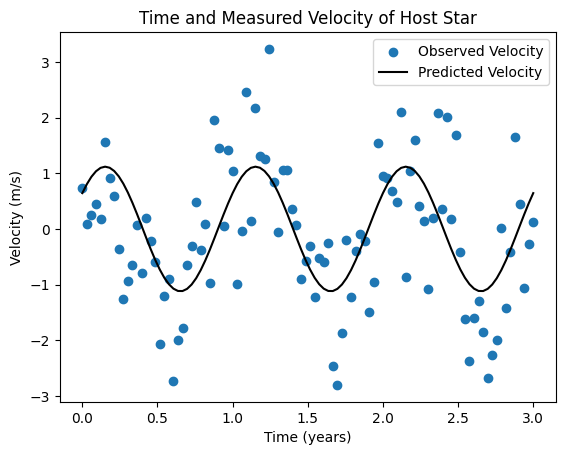

Beta 0: 0.915 degrees
Beta 1: 0.644 degrees
Sigma beta 0: 0.020 degrees
Sigma beta 1: 0.020 degrees

Amplitude: 1.119 degrees
Sigma amplitude: 0.020 degrees

Covariance: -0.00004 correlation


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr

df = pd.read_csv("Problem_Set_2_Exoplanets.csv")
t_list = df["t"]
v_list = df["v"]

# returns measured velocity and design matrix
def design_matrix():
    X = np.empty((len(df), 2))
    for row in range(len(X)):
        for col in range(len(X[0])):
            # going vertically, so columns should remain the same
            match col:
                case 0:
                    X[row][col] = math.sin(2 * math.pi * t_list[row])
                case 1:
                    X[row][col] = math.cos(2 * math.pi * t_list[row])
    return X

def uncertainty():
    X = design_matrix()
    reg = LinearRegression(fit_intercept=False).fit(X, v_list)

    sigma_v = 1

    beta0 = float(reg.coef_[0])
    beta1 = float(reg.coef_[1])
    # phases are measured in degrees
    print(f"Beta 0: {beta0:0.3f} degrees\nBeta 1: {beta1:0.3f} degrees")

    amp = math.sqrt(beta0 ** 2 + beta1 ** 2)
    beta_var = sigma_v ** 2 * np.linalg.inv(X.T @ X)

    var_b0 = beta_var[0][0]
    var_b1 = beta_var[1][1]
    # phases are measured in m/s
    print(f"Sigma beta 0: {var_b0:0.3f} m/s\nSigma beta 1: {var_b1:0.3f} m/s\n")

    sigma_a = (1 / amp) * math.sqrt((beta0 ** 2 * var_b0 ** 2) + (beta1 ** 2 * var_b1 ** 2))
    # i think amplitude is also in degrees?
    print(f"Amplitude: {amp:0.3f} m/s\nSigma amplitude: {sigma_a:0.3f} m/s\n")

    ################################## not sure
    r = pearsonr(t_list, v_list).statistic
    cov = var_b0 * var_b1 * r
    print(f"Covariance: {cov:0.5f} correlation")

def plot_data():
    # plot data as scatter
    X = design_matrix()
    plt.scatter(t_list, v_list, label = "Observed Velocity")
    plt.xlabel("Time (years)")
    plt.ylabel("Velocity (m/s)")
    plt.title("Time and Measured Velocity of Host Star")

    # overplot prediction
    reg = LinearRegression(fit_intercept=False).fit(X, v_list)
    y_pred = reg.predict(X)
    plt.plot(t_list, y_pred, color = "black", label = "Predicted Velocity")
    plt.legend(loc = "best")
    plt.show()

plot_data()
uncertainty()